# Analysis of the risk of failure of the O-rings on the Challenger shuttle

On January 27, 1986, the day before the takeoff of the shuttle _Challenger_, had
a three-hour teleconference was held between 
Morton Thiokol (the manufacturer of one of the engines) and NASA. The
discussion focused on the consequences of the
temperature at take-off of 31°F (just below
0°C) for the success of the flight and in particular on the performance of the
O-rings used in the engines. Indeed, no test
had been performed at this temperature.

The following study takes up some of the analyses carried out that
night with the objective of assessing the potential influence of
the temperature and pressure to which the O-rings are subjected
on their probability of malfunction. Our starting point is 
the results of the experiments carried out by NASA engineers
during the six years preceding the launch of the shuttle
Challenger.

## Loading the data
We start by loading this data:

In [7]:
import numpy as np
import pandas as pd
data = pd.read_csv("shuttle.csv")
data

,Date,Count,Temperature,Pressure,Malfunction
0,4/12/81,6,66,50,0
1,11/12/81,6,70,50,1
2,3/22/82,6,69,50,0
3,11/11/82,6,68,50,0
4,4/04/83,6,67,50,0
5,6/18/82,6,72,50,0
6,8/30/83,6,73,100,0
7,11/28/83,6,70,100,0
8,2/03/84,6,57,200,1
9,4/06/84,6,63,200,1


The data set shows us the date of each test, the number of O-rings (there are 6 on the main launcher), the temperature (in Fahrenheit) and pressure (in psi), and finally the number of identified malfunctions.

## Graphical inspection
Flights without incidents do not provide any information
on the influence of temperature or pressure on malfunction.
We thus focus on the experiments in which at least one O-ring
was defective.

### =====
They filtered out all flights with zero malfunctions, which is a problem because now the data only shows cases where something went wrong. This makes it impossible to see how temperature actually affects failures across all flights.

--> Keep all flights, including those without malfunctions, so the model can learn the real failure probability

In [8]:
# data = data[data.Malfunction>0] --> no filter
data

,Date,Count,Temperature,Pressure,Malfunction
0,4/12/81,6,66,50,0
1,11/12/81,6,70,50,1
2,3/22/82,6,69,50,0
3,11/11/82,6,68,50,0
4,4/04/83,6,67,50,0
5,6/18/82,6,72,50,0
6,8/30/83,6,73,100,0
7,11/28/83,6,70,100,0
8,2/03/84,6,57,200,1
9,4/06/84,6,63,200,1


<!-- We have a high temperature variability but
the pressure is almost always 200, which should
simplify the analysis. -->

First, let's simplify the analysis with pressure is 200

How does the frequency of failure vary with temperature?

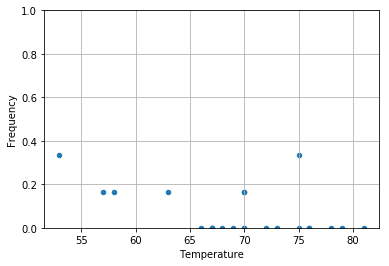

In [21]:
%matplotlib inline
pd.set_option('mode.chained_assignment',None) # this removes a useless warning from pandas
import matplotlib.pyplot as plt

data["Frequency"]=data.Malfunction/data.Count
data.plot(x="Temperature",y="Frequency",kind="scatter",ylim=[0,1])
plt.grid(True)

At first glance, the dependence does not look very important, but let's try to
estimate the impact of temperature $t$ on the probability of O-ring malfunction.

## Estimation of the temperature influence

Suppose that each of the six O-rings is damaged with the same
probability and independently of the others and that this probability
depends only on the temperature. If $p(t)$ is this probability, the
number $D$ of malfunctioning O-rings during a flight at
temperature $t$ follows a binomial law with parameters $n=6$ and
$p=p(t)$. To link $p(t)$ to $t$, we will therefore perform a
logistic regression.

In [10]:
import statsmodels.api as sm

data["Success"]=data.Count-data.Malfunction
data["Intercept"]=1

logmodel=sm.GLM(data['Frequency'], data[['Intercept','Temperature']], family=sm.families.Binomial(sm.families.links.logit)).fit()

logmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Frequency   No. Observations:                   23
Model:                            GLM   Df Residuals:                       21
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3.9210
Date:                Wed, 12 Nov 2025   Deviance:                       3.0144
Time:                        23:11:29   Pearson chi2:                     5.00
No. Iterations:                     6   Covariance Type:             nonrobust
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       5.0850      7.477      0.680      0.496      -9.570      19.740
Temperature    -0.1156      0.115     -1.004      0.316      -0.341       0.110
===============================================================================
"""

The estimated coefficient for Temperature is -0.116 with a standard error of 0.115, which means we cannot confidently say that Temperature has a significant effect on O-ring failure. These estimates should be interpreted with caution.

## Estimation of the probability of O-ring malfunction

The expected temperature on the take-off day is 31°F. Let's try to
estimate the probability of O-ring malfunction at
this temperature from the model we just built:


### ==================
A problem I find very confusing is that they said, "These estimates should be interpreted with caution" (even in the original analysis), but then they still relied on the model’s predictions and used those results to justify their reasoning. ????!

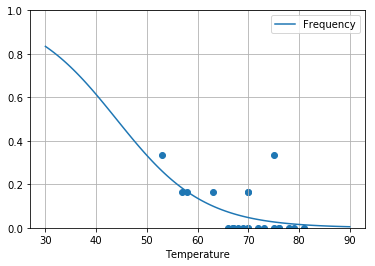

In [11]:
%matplotlib inline
data_pred = pd.DataFrame({'Temperature': np.linspace(start=30, stop=90, num=121), 'Intercept': 1})
data_pred['Frequency'] = logmodel.predict(data_pred[['Intercept','Temperature']])
data_pred.plot(x="Temperature",y="Frequency",kind="line",ylim=[0,1])
plt.scatter(x=data["Temperature"],y=data["Frequency"])
plt.grid(True)

Using the updated analysis, the predicted probability of O-ring failure clearly decreases as temperature increases, forming a curve across the observed range. This shows that at low temperatures like 31°F, the risk is much higher than the simple average would suggest, highlighting the danger under extreme conditions.

In [20]:
# The code below is disregarded because the risk of O-ring failure strongly depends on temperature.
# data = pd.read_csv("shuttle.csv")
# print(np.sum(data.Malfunction)/np.sum(data.Count))

In [17]:
# Let's calculate again
p_challenger = logmodel.predict((1, 31))[0]
print("Predicted probability of O-ring failure at 31°F:", p_challenger)

Predicted probability of O-ring failure at 31°F: 0.8177744062821891


In [19]:
print("Prob of failure for both joints: ", p_challenger**2)
print("Prob of failure for any one of launchers: ", 1-(1-p_challenger**2)**3)

Prob for both joints:  0.6687549795701869
Prob for any one of launchers:  0.963654715320592


This probability is thus about p ≈ $0.818$. Knowing that there is a primary and a secondary O-ring on each of the three parts of the launcher, the probability of failure of both joints of a launcher is $p^2 \approx 0.669$. The probability of failure of any one of the launchers is $1-(1-p^2)^3 \approx 96.4\%$. This is drastically higher than the old average-based estimate of p ≈ 0.065, which underestimated the risk because it ignored the extreme temperature on the launch day.